# Part I - Ford GoBike System Data
## by Arthur Monteiro

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


## Preliminary Wrangling


In [1]:
%pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import geopy.distance
import matplotlib.pyplot as plt
import seaborn as sns

from utils import set_bins, plot_histogram


%matplotlib inline

In [3]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [4]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
print(df.start_time.max())
print(2019 - 1878)

2019-02-28 23:59:18.5480
141


In [8]:
(df.isna().sum() / len(df)) * 100

duration_sec               0.000000
start_time                 0.000000
end_time                   0.000000
start_station_id           0.107408
start_station_name         0.107408
start_station_latitude     0.000000
start_station_longitude    0.000000
end_station_id             0.107408
end_station_name           0.107408
end_station_latitude       0.000000
end_station_longitude      0.000000
bike_id                    0.000000
user_type                  0.000000
member_birth_year          4.506248
member_gender              4.506248
bike_share_for_all_trip    0.000000
dtype: float64

### Conclusions after preliminary wrangling

There is some quality and tidiness issues like missing values, mismatched types and values that probably were wrongly registered. It's unlikely that someone borned in 1878 would rent a bike or be alive. 

So, before start exploring, it's necessary fix this problems.

#### Missing Values

Considerating that the percentile of missing values it's only 4.5% of the data, I choosed to remove this values, since it's easier.

In [9]:
df_clean = df.dropna().copy()

#### Correcting columns types and Creating Values

In [10]:
for col in ['start', 'end']:
    df_col = f'{col}_time' # Defining if col it's start_time or end_time
    
    df_clean[df_col] = pd.to_datetime(df_clean[df_col]) # Trasnforming into datetime type
    df_clean[f'{col}_weekday'] = df_clean[df_col].dt.day_name() # Getting name of weekday 
    df_clean[f'{col}_hour'] = df_clean[df_col].dt.hour # Getting hour of the register

In [11]:
# Boolean values

df_clean['bike_share_for_all_trip'] = df_clean.bike_share_for_all_trip == 'Yes'

In [12]:
df_clean['member_age'] = df_clean.start_time.dt.year.unique()[0] - df_clean.member_birth_year
df_clean = df_clean.query('member_age <= 80')

In [13]:
# Creating category type with a corrected order   

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordered_days)

# Dictionary with col name and col type value
column_types = {
    'member_age': int,
    'user_type': 'category',
    'member_gender': 'category',
    'start_weekday': ordered_var,
    'end_weekday': ordered_var,
}

# Loop changing col types
for col, col_type in column_types.items():
    df_clean[col] = df_clean[col].astype(col_type)

In [14]:
# Code based on https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
# Accessed on nov 14th, 2022 at 10:20

def calc_distance(initial_coord: list, final_coord: list) -> float:
    '''
    @param initial_coord: a list with x and y coordinate
    @param final_coord: a list with x and y coordinate
    
    @return the distance in kilometers between the initial and final coordinates
    '''
    return geopy.distance.geodesic(initial_coord, final_coord).km

In [15]:
# Calculating the distance of the stations by the location

df_clean['distance_km'] = df_clean.apply(lambda x: calc_distance(
                                [x.start_station_latitude, x.start_station_longitude],
                                [x.end_station_latitude, x.end_station_longitude]
                            ), axis=1)

#### Removing columns that will not be used for sure

In [16]:
drop_columns = ['start_station_id', 'start_station_name', 
                'start_station_latitude', 'start_station_longitude',
                'end_station_id', 'end_station_name', 
                'end_station_latitude', 'end_station_longitude',
                'start_time', 'end_time', 'member_birth_year', 'bike_id', 
                'member_gender', 'user_type', 'bike_share_for_all_trip']

df_clean = df_clean.drop(drop_columns, axis=1)

### Rechecking Data

In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174760 entries, 0 to 183411
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   duration_sec   174760 non-null  int64   
 1   start_weekday  174760 non-null  category
 2   start_hour     174760 non-null  int64   
 3   end_weekday    174760 non-null  category
 4   end_hour       174760 non-null  int64   
 5   member_age     174760 non-null  int64   
 6   distance_km    174760 non-null  float64 
dtypes: category(2), float64(1), int64(4)
memory usage: 8.3 MB


In [18]:
df_clean.isna().sum()

duration_sec     0
start_weekday    0
start_hour       0
end_weekday      0
end_hour         0
member_age       0
distance_km      0
dtype: int64

In [19]:
df_clean.describe()

,duration_sec,start_hour,end_hour,member_age,distance_km
count,174760.000000,174760.000000,174760.000000,174760.000000,174760.000000
mean,704.309630,13.456100,13.609527,34.125223,1.690354
std,1643.031657,4.735548,4.749307,9.877739,1.096234
min,61.000000,0.000000,0.000000,18.000000,0.000000
25%,323.000000,9.000000,9.000000,27.000000,0.909777
50%,511.000000,14.000000,14.000000,32.000000,1.428727
75%,789.000000,17.000000,18.000000,39.000000,2.225495
max,84548.000000,23.000000,23.000000,80.000000,69.465977


In [20]:
df_clean = df_clean.query('distance_km <= 20')

### Storing the data

In [21]:
df_clean.to_csv('201902_master_go_ford.csv', index=False)

### What is the structure of your dataset?

> The original dataset has the following information of some rides for February 2019:
> - Duration of the rides in seconds;
> - Start and Ent Time of the ride;
> - Station Information as the id, the name and the location in coordinates;
> - The user information as year of birth, gennder and subscription type (Customer or Subscription)
> - The bike id
>
> After my wrangling process, there are 174,759 rides with 7 features.

### What is/are the main feature(s) of interest in your dataset?

> I want to analyze if the distance of the places where the bikes were got and left has some relation with the day, the hour of the day or the duration of the ride. So, my key feature it's the distance of the stations.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The duration in seconds, the weekday and hour of the day are the main subfeatures to analyze. 

In [22]:
df_master = pd.read_csv('201902_master_go_ford.csv')

## Univariate Exploration

In [23]:
def set_log_bins(df, col):
    '''
    @param df: DataFrame
    @param col: column interested on get the bins
    
    @return the bins to plot histograms in log scale
    '''
    log_describe = np.log10(df[col].describe())
    
    step = log_describe['std'] / 3 / 10
    return 10 ** np.arange(log_describe['min'], log_describe['max'] + step, step)


In [24]:
def plot_log_histogram(df, col, axvline = None):
    '''
    @param df: DataFrame
    @param col: column interested see the distribution
    @param axvline: the percentile (0 to 100) to mark a vertical line on the histogram
    
    @return the plotted histogram in log scale
    '''
    
    bins = set_log_bins(df, col)

    # Convert ticks into string values, to be displaye dlong the x-axis
    ticks = [int(np.round(v)) for v in bins]
    labels = [f'{v}' for v in ticks]
    
    sns.histplot(x=df[col], bins=bins)
    plt.ylabel('Frequency')
    
    plt.xscale('log');
    plt.xticks(ticks[::6], labels[::6]);
    
    if (axvline):
        plt.axvline(np.percentile(df[col], axvline), color='r', linewidth=1.5)

In [25]:
distance_lower_1km = (df_master.distance_km < 1).mean() *100

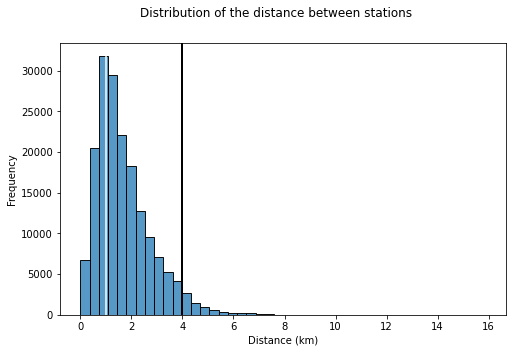

In [26]:
plt.figure(figsize=[8, 5])
plot_histogram(df_master, 'distance_km', 96)
plt.axvline(np.percentile(df_master.distance_km, distance_lower_1km), color='white', linewidth=1.5)
plt.xlabel('Distance (km)');
plt.suptitle('Distribution of the distance between stations');

~30% of data has the distance lower than 1%. 96% of the data has the distance of stations between 4km.

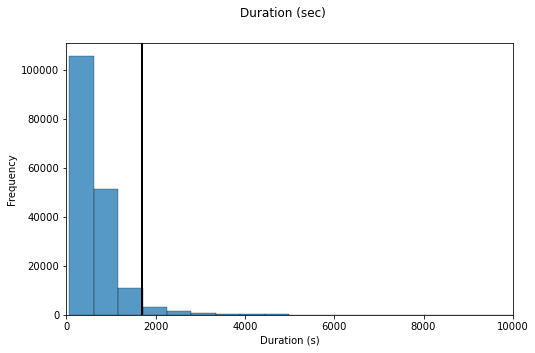

In [27]:
plt.figure(figsize=[8, 5])
plot_histogram(df_master, 'duration_sec', 96)
plt.xlabel('Duration (s)');
plt.suptitle('Duration (sec)');
plt.xlim(0, 1e4);

The duration in seconds has a long tail to the right, so I will apply a log scale to better understand this data.

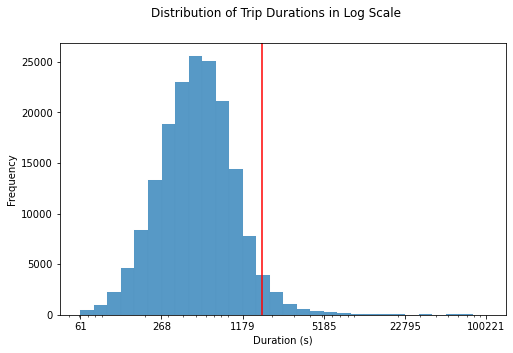

In [28]:
plt.figure(figsize=[8, 5])
plot_log_histogram(df_master, 'duration_sec', 96)
plt.xlabel('Duration (s)')
plt.suptitle('Distribution of Trip Durations in Log Scale');

The distribution of the trips durations in log scale follows a normal distribution. And 96% of the data it's under 2,000 seconds (under 30 minutes). Also, there is some people that rent the bike for just one minute.

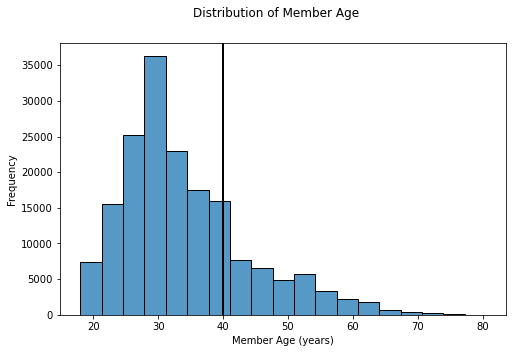

In [29]:
line = (df_master.member_age.between(20, 40)).mean() * 100
plt.figure(figsize=[8, 5])
plot_histogram(df_master, 'member_age', line)
plt.suptitle('Distribution of Member Age')
plt.xlabel('Member Age (years)');

There is a peak on users around the 30's. Also almost 80% of the users are between 20 and 40 years old.

In [30]:
base_color = sns.color_palette()[0]

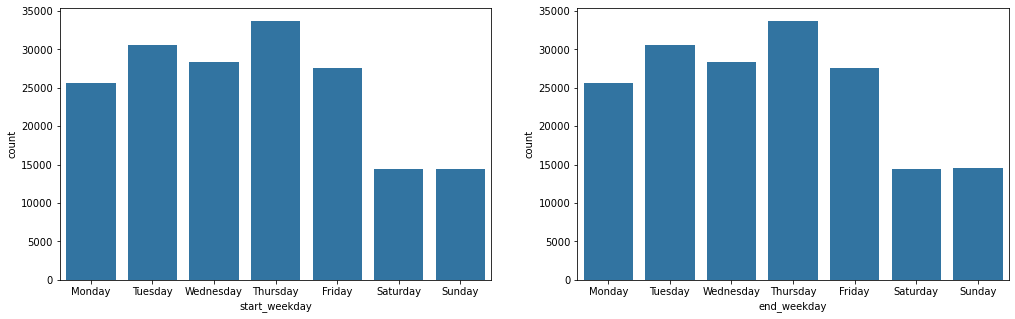

In [31]:
plt.figure(figsize = [17, 5]) 

plt.subplot(1,2,1)
sns.countplot(x=df_master.start_weekday, color=base_color, order=ordered_days);

plt.subplot(1, 2, 2)
sns.countplot(x=df_master.end_weekday, color=base_color, order=ordered_days);

Most part of the users use more during the week (Monday to Friday), with a highest use at Thursdays. Weekends have a lower movement.

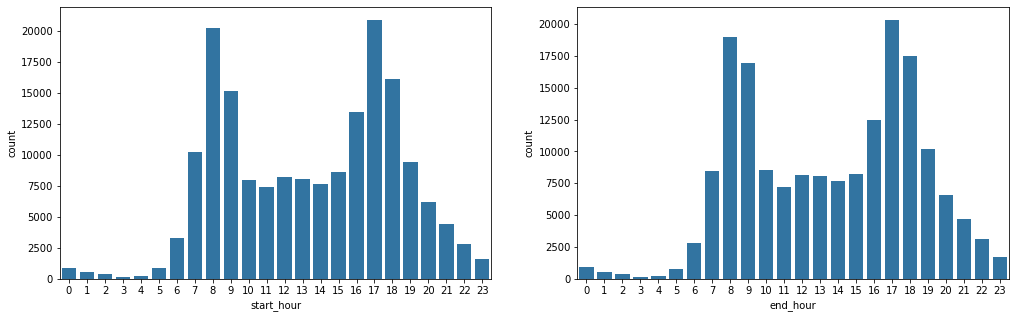

In [32]:
plt.figure(figsize = [17, 5]) 

plt.subplot(1,2,1)
sns.countplot(x=df_master.start_hour, color=base_color);

plt.subplot(1, 2, 2)
sns.countplot(x=df_master.end_hour, color=base_color);


The hours that bikes were rent and delivered are bimodal, with peaks at 8 and 17 o'clock. The movement get lower and lower at night, but it's interesting that still there is some bike renting at the dawn (23 to 4 o' clock)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> On my variable of interest there wasn't anythin unusual. Appereantly, almost 30% of the people leaves the bike in some station with less than 1 kilometer of distance. And it's interisting that 96% leaves on station with at least 4 km.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The duration that people rent the bike had a long rigth tail, so I applyed a log scale across the x axis. With this, was easier to observe standarts. With the weekdays and hours of rent, was interest to see that people looks like rent more on Thursdays and preferenciable at 8 or 17 o'clock.

## Bivariate Exploration

In [33]:
duration_sec_96 = np.percentile(df_master.duration_sec, 96)
distance_km_96 = np.percentile(df_master.distance_km, 96)

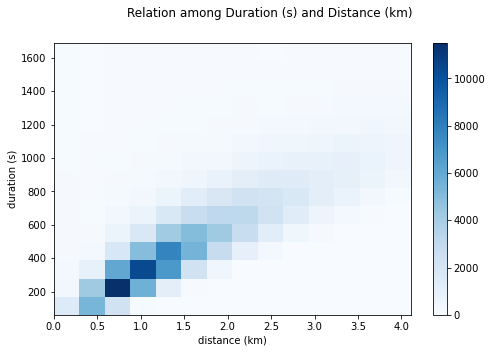

In [34]:
#the plot above looks a bit messy, let's use a heat map to depict the data.
plt.figure(figsize=[8, 5])


bins_y = set_bins(df_master.query('duration_sec <= @duration_sec_96'), 'duration_sec')
bins_x = set_bins(df_master.query('distance_km <= @distance_km_96'), 'distance_km')

plt.hist2d(data = df_master, x = 'distance_km', y='duration_sec',
           bins = [bins_x, bins_y], cmap ='Blues')

plt.ylabel('duration (s)')
plt.xlabel('distance (km)')

plt.suptitle('Relation among Duration (s) and Distance (km)')

plt.colorbar()
plt.show()

Following the above heatmap, there is a linear relation between the duration of the rent and the distance between the stations where the bike was got and left. Appereantly, as the distance get bigger, the duration get algo bigger. This make sense, since it's necessary to ride until the next station.

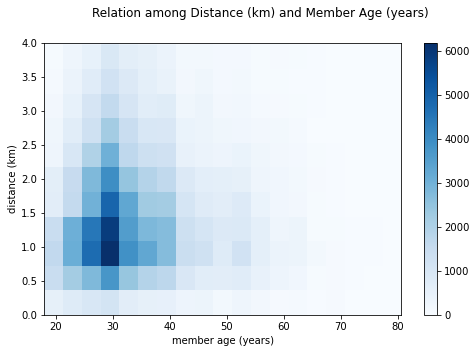

In [35]:
#the plot above looks a bit messy, let's use a heat map to depict the data.
plt.figure(figsize=[8, 5])

bins_y = set_bins(df_master, 'distance_km')
bins_x = set_bins(df_master, 'member_age')


plt.hist2d(data = df_master, x = 'member_age', y='distance_km',
           bins = [bins_x, bins_y], cmap ='Blues')

plt.ylim(0, 4);

plt.ylabel('distance (km)')
plt.xlabel('member age (years)')

plt.suptitle('Relation among Distance (km) and Member Age (years)')

plt.colorbar()
plt.show()

Looks like that there is not a relation between the member age and the distance, even being possible to see that people among the 30s ride more distances than the others age.

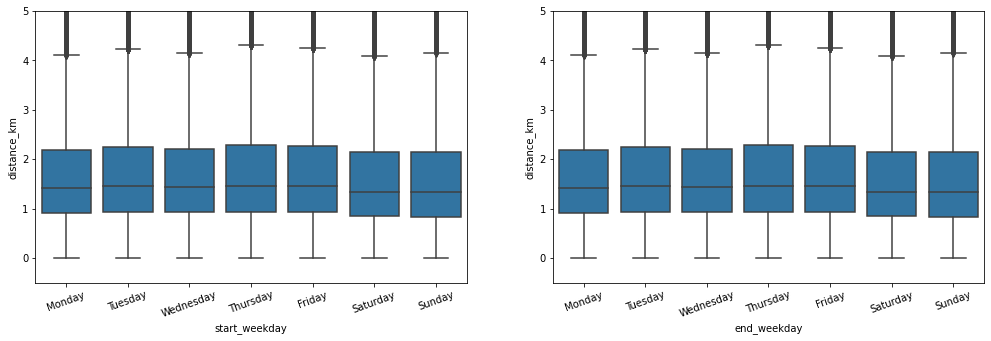

In [36]:
plt.figure(figsize = [17, 5]) 

plt.subplot(1,2,1)
sns.boxplot(y='distance_km', x='start_weekday', data=df_master, order=ordered_days, color=base_color);
plt.ylim(-.5, 5);
plt.xticks(rotation = 20);

plt.subplot(1, 2, 2)
sns.boxplot(y='distance_km', x='end_weekday', data=df_master, order=ordered_days, color=base_color);

plt.ylim(-.5, 5);
plt.xticks(rotation = 20);

There is not relation between the day of the week and the distance between the stations.

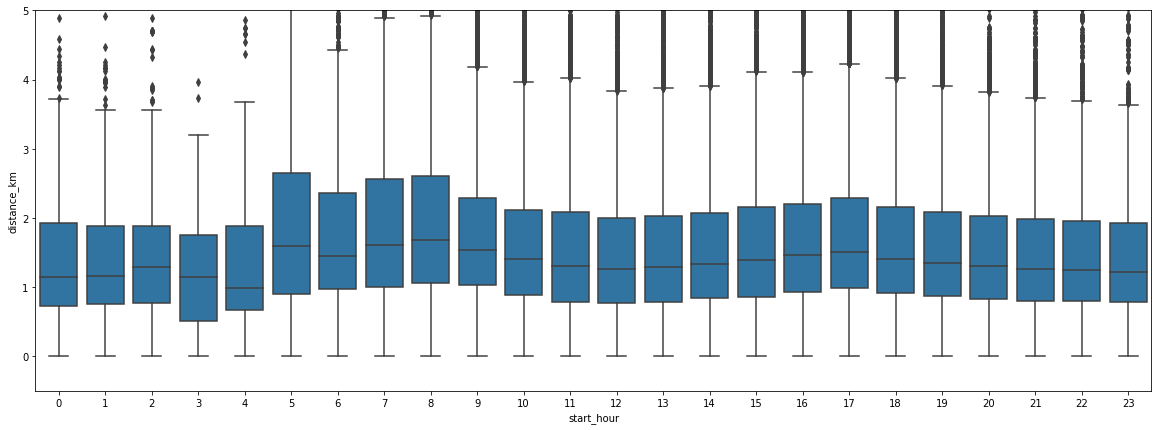

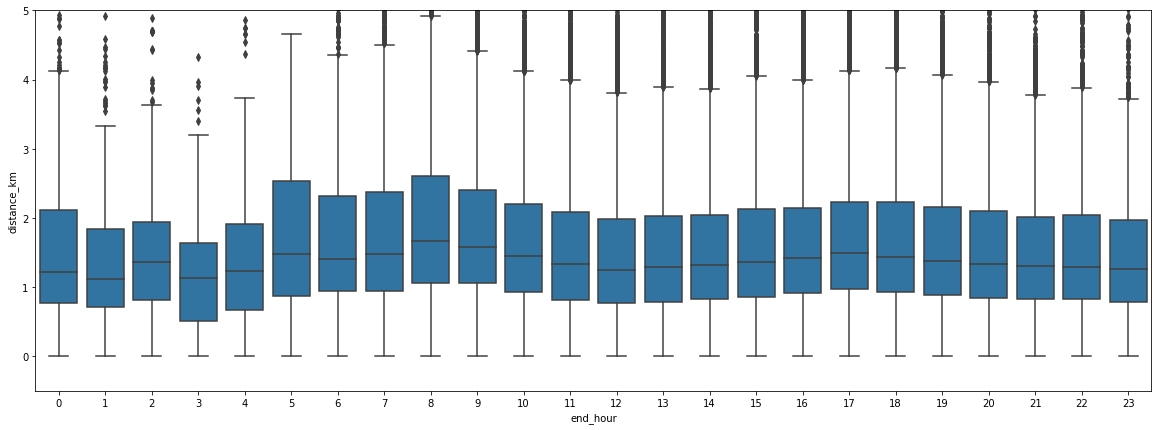

In [37]:
plt.figure(figsize = [20, 7]) 

sns.boxplot(x='start_hour', y='distance_km', data=df_master, color=base_color);
plt.ylim(-.5, 5);
plt.show();

plt.figure(figsize = [20, 7]) 

sns.boxplot(x='end_hour', y='distance_km', data=df_master, color=base_color);
plt.ylim(-.5, 5);
plt.show();


Does not look like that there is some relation between the hour that the rent start and the hour that the rent finished with the distance between the stations.

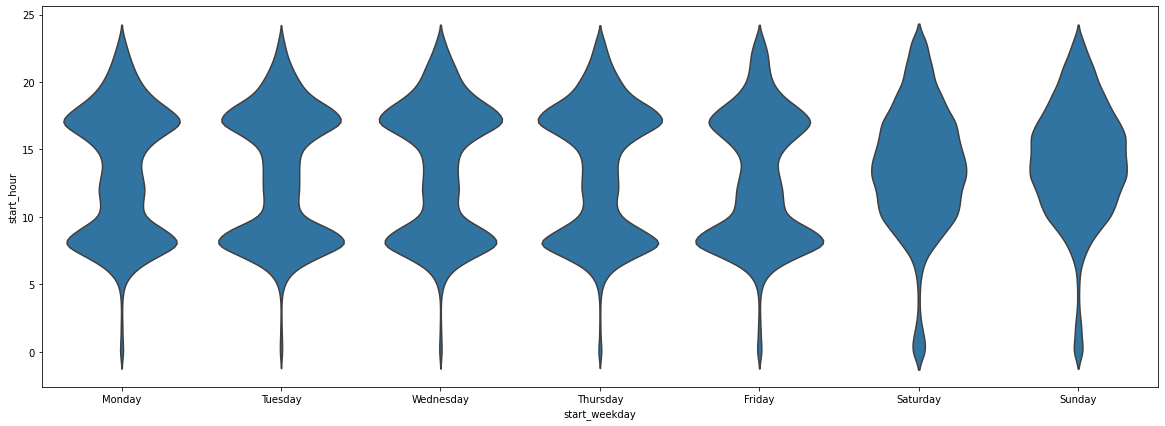

In [38]:
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize = [20, 7]) 
base_color = sns.color_palette()[0]

sns.violinplot(y='start_hour', x='start_weekday', data=df_master, order=ordered_days, color=base_color, inner=None);

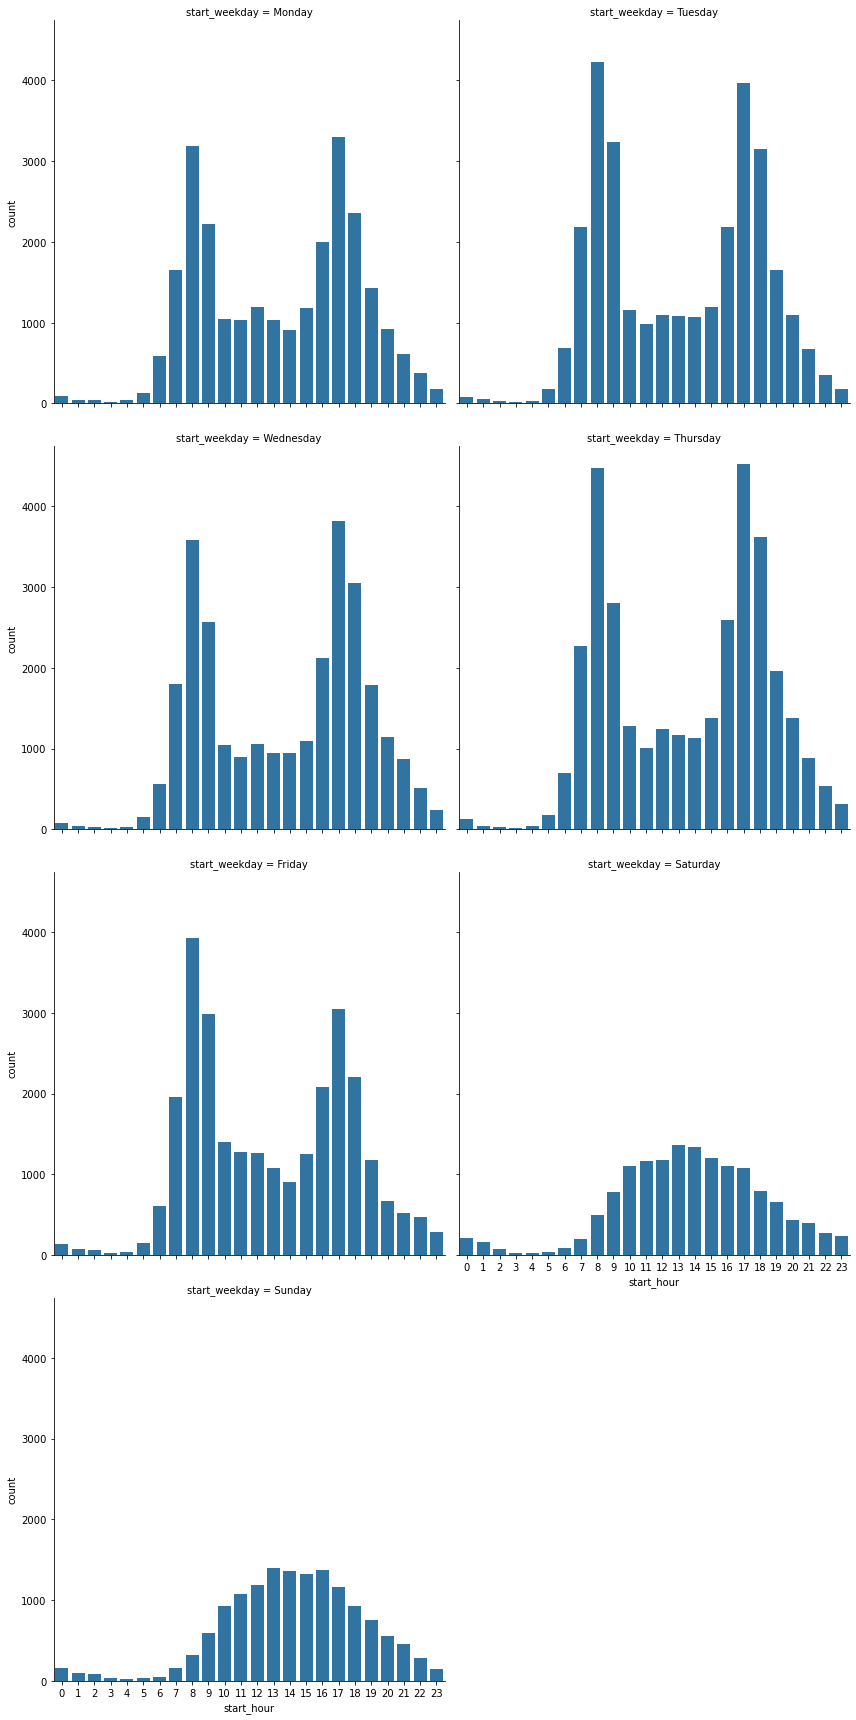

In [39]:
g = sns.FacetGrid(data = df_master, col = 'start_weekday', margin_titles = True, height=6, col_wrap=2, col_order=ordered_days);
g.map(sns.countplot,'start_hour', order=df_master.start_hour.sort_values().unique());

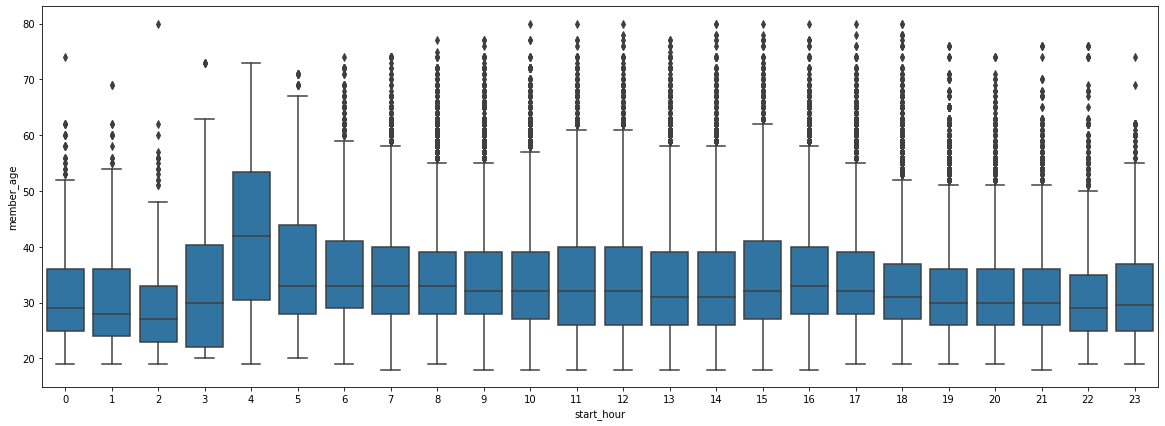

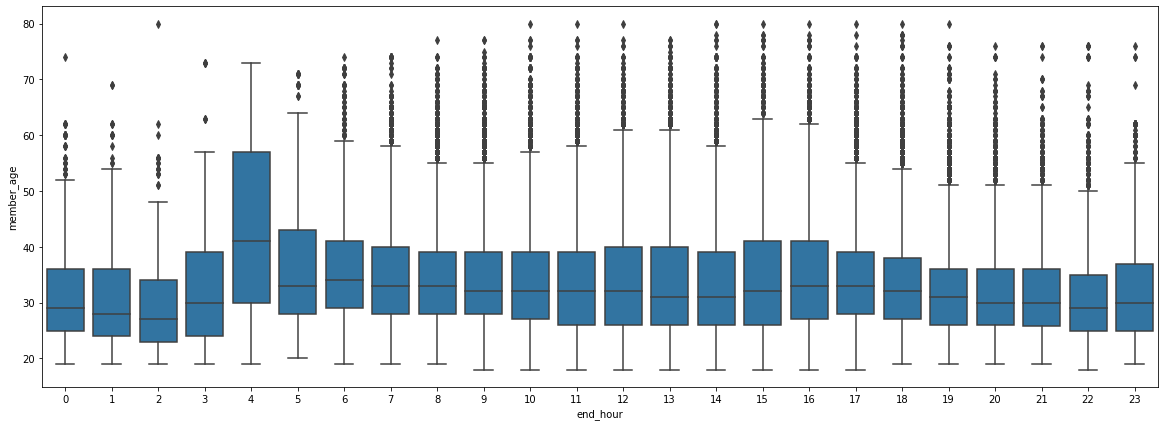

In [40]:
plt.figure(figsize = [20, 7]) 

sns.boxplot(x='start_hour', y='member_age', data=df_master, color=base_color);
plt.show();

plt.figure(figsize = [20, 7]) 

sns.boxplot(x='end_hour', y='member_age', data=df_master, color=base_color);
plt.show();


Younger people looks prefer rent bike during dawn (0 ~ 3 hours), and older people prefer at 4 o'clock. The other periods, appereatly, doesn't have a preference by some specifc age.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There is a linear relation between the duration of the rent and the distance between the stations where the bike was got and left. Appereantly, as the distance get bigger, the duration get algo bigger. This make sense, since it's necessary to ride until the next station.
> Looks like that there is not a relation between the member age and the distance, even being possible to see that people among the 30s ride more distances than the others age.
> Also, was not possible to see any relation across the weekday or the hour and the distance among the stations. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Appearently, younger people prefer rent bike during dawn (0 ~ 3 hours), and older people prefer at 4 o'clock. The other periods, was not a preference by some specifc age.
> The peaks of rent at 8 and 17 o'clock looks to happen only during the week. On the weekends, the trend it's a normal distribution at 7 until 23.

## Multivariate Exploration

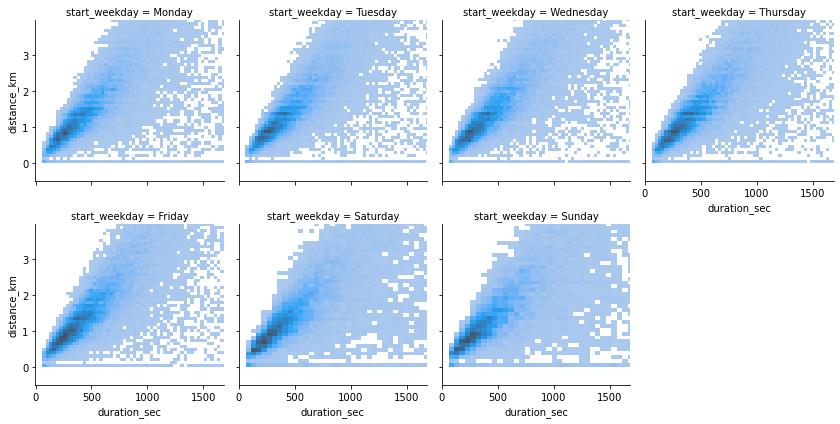

In [41]:
g = sns.FacetGrid(data = df_master, col = 'start_weekday', margin_titles = True, col_wrap=4, col_order=ordered_days);
g.map(sns.histplot,'duration_sec', 'distance_km');
plt.xlim(-.5, duration_sec_96)
plt.ylim(-.5, distance_km_96);

As saw earlier, the relation between the duration and the distance is linear. But it's possible to see that people looks get the bike during more time on the weekends.

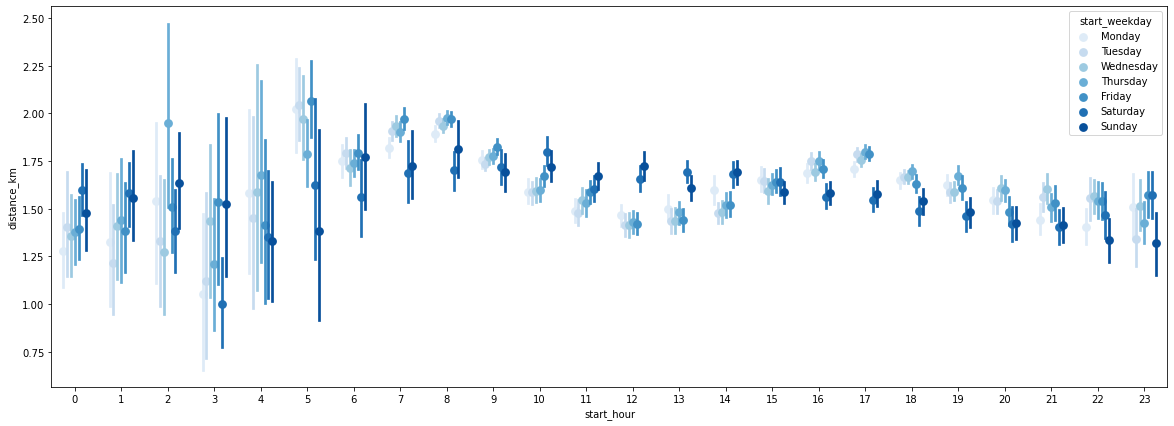

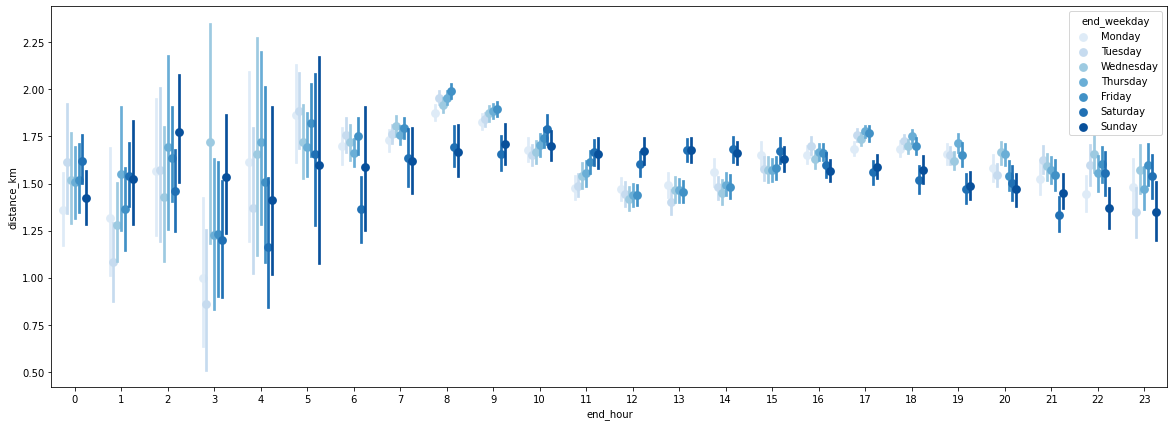

In [42]:
plt.figure(figsize = [20, 7]) 

sns.pointplot(data = df_master, x = 'start_hour', y = 'distance_km', hue = 'start_weekday',
             palette = 'Blues', linestyles = '', dodge = 0.5,  hue_order=ordered_days);
plt.show()

plt.figure(figsize = [20, 7]) 
sns.pointplot(data = df_master, x = 'end_hour', y = 'distance_km', hue = 'end_weekday',
             palette = 'Blues', linestyles = '', dodge = 0.5,  hue_order=ordered_days);
plt.show()

During the weekends it's more linear the distance that people ride during the day, and during the week, people go far to leave the bikes during the morning hours as 2 to 5 o'clock.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The multivariable vizualitions strengthened some of the previous relations discovered, as for example, the linear relation of the distance and the duration.

### Were there any interesting or surprising interactions between features?

> It's possible to see that people looks get the bike during more time on the weekends. And also, during the weekends it's more linear the distance that people used to ride during the day. By the other hand, during the week, people go dar to leave the bikes during the morning hours (2 ~ 5 o'clock).

## Conclusions
> - ~30% of data has the distance lower than 1%. 
> - 96% of the data has the distance of stations between 4km.
> - 96% of the data it's under 2,000 seconds (under 30 minutes). 
> - There is some people that rent the bike for just one minute.
> - ~80% of the users are between 20 and 40 years old.
> - Linear relation between the duration of the rent and the distance between the stations where the bike was got and left
> - People looks get the bike during more time on the weekends.